<a href="https://colab.research.google.com/github/Andishafira/Tugas_PraktikumML-D_219-231/blob/Fira/Skenario_Model_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Conv2D, MaxPool2D
from tensorflow.keras.layers import Dropout, SpatialDropout2D
from keras.layers import GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Flatten
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/TugasBesar_MachineLearning"

In [4]:
%cd /content/drive/MyDrive/TugasBesar_MachineLearning

/content/drive/MyDrive/TugasBesar_MachineLearning


In [5]:
!ls

chest_xray  kaggle.json


In [6]:
#Pengambilan Data
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [7]:
train = get_training_data('/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/train')
test = get_training_data('/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/test')
val = get_training_data('/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/val')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


In [8]:
#Splitting Data
#X = Fitur
#Y = Label
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [9]:
#Normalisasi Data
#Biar dalam rentang 0-1
x_train = np.array(x_train) / 255 #255 = nilai max
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [10]:
#Resize Data
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [12]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

In [13]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(y_train)

[0 0 0 ... 1 1 1]


In [14]:
model6 = Sequential()
model6.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model6.add(BatchNormalization())
model6.add(AveragePooling2D((2,2) , strides = 2 , padding = 'same'))

model6.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model6.add(Dropout(0.1))
model6.add(BatchNormalization())
model6.add(AveragePooling2D((2,2) , strides = 2 , padding = 'same'))

model6.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model6.add(BatchNormalization())
model6.add(AveragePooling2D((2,2) , strides = 2 , padding = 'same'))

model6.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model6.add(Dropout(0.15))
model6.add(BatchNormalization())
model6.add(AveragePooling2D((2,2) , strides = 2 , padding = 'same'))

model6.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model6.add(Dropout(0.2))
model6.add(BatchNormalization())
model6.add(AveragePooling2D((2,2) , strides = 2 , padding = 'same'))

model6.add(Flatten())
model6.add(Dense(units = 128 , activation = 'relu'))
model6.add(Dropout(0.2))

model6.add(Dense(units = 1 , activation = 'sigmoid'))
model6.compile(optimizer = "sgd" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [20]:
import time

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
model_6 = model6.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 100 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/100
146/146 [==============================] - 29s 116ms/step - loss: 0.3265 - accuracy: 0.8504 - val_loss: 0.5761 - val_accuracy: 0.7304 - lr: 0.0100
Epoch 2/100
146/146 [==============================] - 16s 111ms/step - loss: 0.2538 - accuracy: 0.8968 - val_loss: 0.7715 - val_accuracy: 0.7304 - lr: 0.0100
Epoch 3/100
146/146 [==============================] - 16s 111ms/step - loss: 0.2342 - accuracy: 0.9033 - val_loss: 0.3715 - val_accuracy: 0.8548 - lr: 0.0100
Epoch 4/100
146/146 [==============================] - 16s 111ms/step - loss: 0.2179 - accuracy: 0.9140 - val_loss: 0.3408 - val_accuracy: 0.8503 - lr: 0.0100
Epoch 5/100
146/146 [==============================] - 16s 110ms/step - loss: 0.2081 - accuracy: 0.9167 - val_loss: 0.3228 - val_accuracy: 0.8638 - lr: 0.0100
Epoch 6/100
146/146 [==============================] - 16s 111ms/step - loss: 0.2112 - accuracy: 0.9167 - val_loss: 0.7970 - val_accuracy: 0.6141 - lr: 0.0100
Epoch 7/100
146/146 [=========================

In [16]:
from sklearn.metrics import classification_report

pred = model6.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       810
           1       0.85      0.96      0.90       299

    accuracy                           0.94      1109
   macro avg       0.92      0.95      0.93      1109
weighted avg       0.95      0.94      0.94      1109



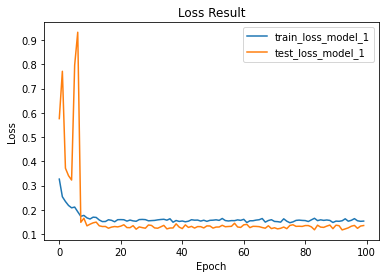

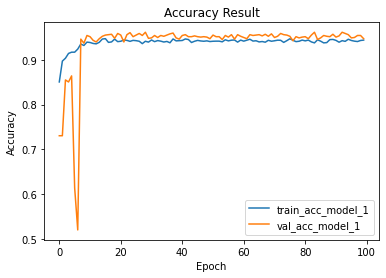

In [18]:
import matplotlib.pyplot as plt

plt.plot(model_6.history["loss"], label="train_loss_model_1")
plt.plot(model_6.history["val_loss"], label="test_loss_model_1")
plt.title("Loss Result")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.plot(model_6.history["accuracy"], label="train_acc_model_1")
plt.plot(model_6.history["val_accuracy"], label="val_acc_model_1")
plt.title("Accuracy Result")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [19]:
model6.save('model_6.h5')